In [3]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


# 1. Introduction


In [4]:
print('hello world.')

hello world.


In [5]:
# Figure out how to add comments in python. 

In [6]:
# Print pi with 3, 8, and 16 significant digits. 

print("%.3f" % pi) # 3 decimal places 
print("%.8f" % pi)
print("%.16f" % pi)

3.142
3.14159265
3.1415926535897931


In [7]:
import pylab
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Lennard-Jones Potential

Lennard-Jones potential is pair potential of intermolecular potential this is interaction between two molecule that are not bonding. (based on ideas from Wikipedia on <https://en.wikipedia.org/wiki/Lennard-Jones_potential>). The equation :
\begin{equation} V_{LJ}=4\epsilon[(\sigma/r)^{12}-(\sigma/r)^6] \end{equation}

r is the distance between the molecules that can express in nm (base unit of distance is m). $\sigma$ can cancle out with r. 


Text(0.5, 0, '$r$')

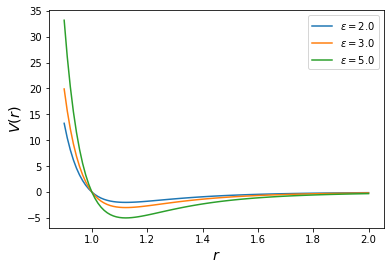

In [8]:
def V(r, eps):
    return 4*eps*((1.0/r)**12. - (1./r)**6.)

rs = np.arange(0.8, 2.0, 0.01)
## OR can use the number of points
rs = np.linspace(0.9, 2.0, 100)

epsilons = [2.0, 3.0, 5.0]
for eps in epsilons:
    plt.plot(rs, V(rs, eps))
labels = [r'$\epsilon='+str(eps)+'$' for eps in epsilons]
plt.legend(labels, loc=0) # loc=0 picks the best location for the legend
plt.ylabel(r'$V(r)$', size='x-large')
plt.xlabel(r"$r$", size='x-large')


# 3. Trajectory Analysis

In [9]:
x, y = np.genfromtxt('droid_traj.csv', skip_header=1, delimiter=',',unpack=True)

#The data is loaded into an array. The array looks like 1row with many columns each x and y array. 
#Each column represent the displacement in x and y measurements at a time.


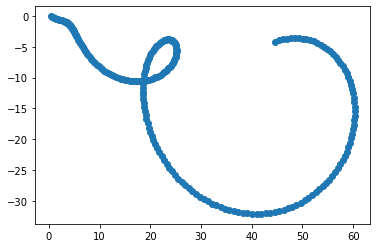

In [10]:
#scatter
plt.scatter(x, y)
plt.show()

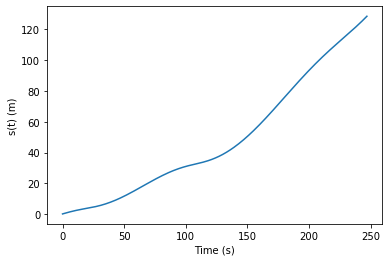

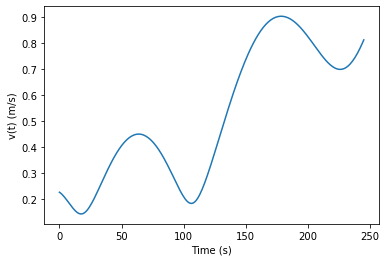

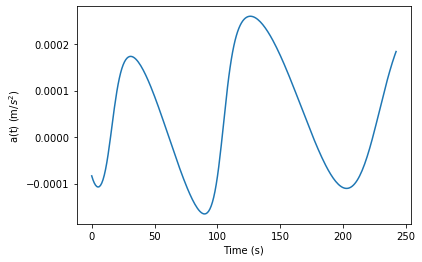

In [11]:
import math
l=[]
v=[]
a=[]

def S(x,y):
    length = 0
    
    for i in range (0,len(x)-1):
        length = length + math.sqrt(pow(x[i+1]-x[i],2) + pow(y[i+1]-y[i],2))
        l.append(length)
        
    return length

def V(x,y):
    velocity=0
    for i in range (1,len(x)-2):
        velocity = (l[i+1]-l[i])/1
        v.append(velocity)
    return 
def A(x,y):
    accel=0
    for i in range (2,len(x)-4):
        accel = (v[i+1]-v[i])/60
        a.append(accel)
    return 

t = np.arange(0, 248,1)
t2 = np.arange(0,246,1)
t3 = np.arange(0,243,1)
S(x,y)
V(x,y)
A(x,y)


plt.plot(t,l)
plt.xlabel("Time (s)")
plt.ylabel("s(t) (m)")
plt.show()

plt.plot(t2,v)
plt.xlabel("Time (s)")
plt.ylabel("v(t) (m/s)")
plt.show()

plt.plot(t3,a)
plt.xlabel("Time (s)")
plt.ylabel("a(t) (m/$s^2$)")
plt.show()




# 4. Random numbers

### 4.1 Pseudo-random number generators

One of simple ramdom number generagtor, linear congruential generator, shows the equation 
$$x_{i+1}=(ax_i+c)\mod m$$


In [12]:
#Assign parameters
a=12
c=0
m=143
x_i=1
sequence=[1]
#generating for loop to figure out the sequence

for i in range(0,11): 
    x_i=(a*x_i+c)%m
    sequence.append(x_i)
print (sequence)

[1, 12, 1, 12, 1, 12, 1, 12, 1, 12, 1, 12]


This sequence shows that repeats of 12 and 1. This repeat starts at the x_2, which is the third element. 
Since 12X12 is 144, and 144 mod 143 is 1 which is our zeroth term in the sequence. 
So, parameters were chosen because the remainder comes out to be the zeroth term at some point. 

1000
1000


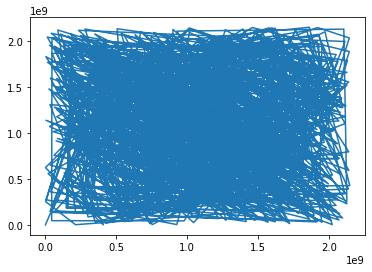

In [13]:
#generating function of the random number generator

a=65539
c=0
m=2**31
x_i=1
sequence=[x_i] # This list is sequence of x_i
#generating for loop to figure out the sequence
def generator (a,x_i,c,m):
    for i in range(0,999): 
        x_i=(a*x_i+c)%m
        sequence.append(x_i) #apend the a_x+1 value to a sequence list
    return x_i

generator (a,x_i,c,m) #list created with the parameter with a,x_i,c,m

x_iplus1=[] # The list "x_iplus1" is the list sequence of x+i 

def generator_two (a,x_i,c,m):
    for i in range(1,1001):  # set different range 
        x_i=(a*x_i+c)%m
        x_iplus1.append(x_i) #apend the a_x+1 value to a sequence list
    return x_i

generator_two (a,x_i,c,m)
print (len(sequence)) # see the number of list matches
print (len(x_iplus1))
plt.plot(sequence,x_iplus1) # plot x_{i} vs x_{i+1}



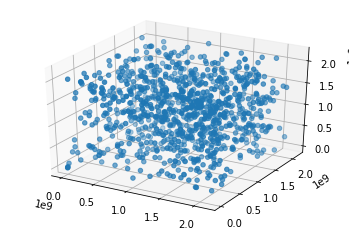

In [14]:
# 3D plotting the triplet (𝑥_{𝑖+2},𝑥_{i+1},𝑥_{i}).
from mpl_toolkits import mplot3d #import the 3D library

x_iplus2=[] #list for x_{i+2}

def generator_three (a,x_i,c,m):
    for i in range(1,1001):  # set different range 
        x_i=(a*x_i+c)%m
        x_iplus2.append(x_i) #apend the a_x+1 value to a sequence list
    return x_i

generator_three(a,65539,c,m)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(sequence,x_iplus1, x_iplus2 )


### 4.2 Generating uniform random numbers and timing calculations

In [15]:
?random.random

0.0003227926790714264


(array([0.98518157, 0.99718378, 0.94517419, 1.05019355, 0.91616885,
        1.03819134, 1.03219023, 1.03519078, 1.05419429, 0.94817475]),
 array([1.05511919e-04, 1.00087082e-01, 2.00068652e-01, 3.00050222e-01,
        4.00031793e-01, 5.00013363e-01, 5.99994933e-01, 6.99976503e-01,
        7.99958073e-01, 8.99939644e-01, 9.99921214e-01]),
 <a list of 10 Patch objects>)

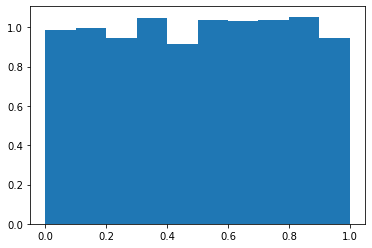

In [22]:
from timeit import default_timer as timer

start = timer()  
random.random(10000)  #determine how long this takes
end = timer()
print(end - start)

numbers=random.random(10000) #make an array of 10,000 random numbers
plt.hist(numbers,density=True)


In [23]:
?random.exponential

In [26]:
r=0.76
dt=0.0005
rdt =r*dt # rdt < 1

decay_times=random.exponential(scale=1./r,size=(1000))

In [25]:
Ndecay =10000 # Generate 10000 decay times by simulating a first order decay process
decay_times = [] #this list stores decay times
for i in np.arange (Ndecay):
    t=0.0
    while random.random() >= dt: #add the dt until random.random()<dt
        t+=dt
    decay_times.append(t) #store the value t to the dacay_time list

Text(0.5, 0, 'Time (s)')

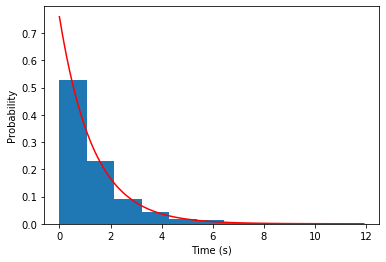

In [47]:
plt.hist(decay_times,density=True) #plot histogram
ts= np.arange(0,12,0.1)
plt.plot(ts,r*np.exp(-r*ts),'r') #plot the exponentials
plt.ylabel("Probability")
plt.xlabel("Time (s)")


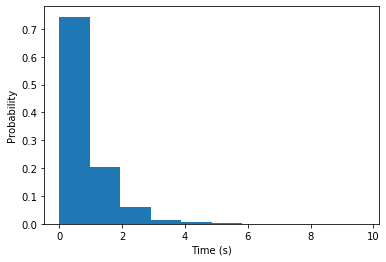

In [46]:
histogram = np.random.exponential(0.76,10000) 
count, bins, ignored = plt.hist(histogram , density = True) 
plt.ylabel("Probability")
plt.xlabel("Time (s)")
plt.show()

# 5.  Random walks

In [ ]:
from timeit import default_timer as timer

In [69]:
# this code builds up the walks, one walk at a time. i
Nwalks=10000
a=1
Nsteps=10 # N = the number of iterations 
msd=[]
N=[]
xN= [] #list that shows the final displacement of walks
for i in range(Nwalks):
    x=0.0
    N.append(i)
    for j in range(Nsteps):
        if random.random()<0.5:
            x-= 1.0
        else:
            x+= 1.0
    xN.append(x)
    msd.append(x**2)
    
xN = array(xN)
xN2 = xN*xN

print("<x(N)> =",np.mean(xN)," #Mean of x(N) when N=10" )
print ("<x(N)^2> =", np.mean(xN2), "#Mean squared value of x(N) when N=10 ")



<x(N)> = 0.06  #Mean of x(N) when N=10
<x(N)^2> = 10.1488 #Mean squared value of x(N) when N=10 


According to Phys 347 Fall 2020 class, the end-to-end distance is most probable with N segment of length a, in one dimension is zero.
the mean of end-to-end distance is likely to be zero in 1D. 

Text(0, 0.5, 'MSD')

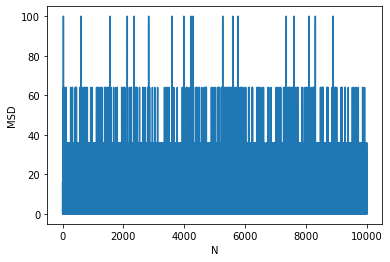

In [64]:
plt.plot(N,msd)
plt.xlabel("N")
plt.ylabel("MSD")